# Segment 4: Eigenvectors & Eigenvalues

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt

## 33. Applying Matrices

## 34. Affine Transformations
- It does:
  + Linear transformation (rotate, scale, or shear)
  + Translation (shift or move)
- It keeps:
  + Straight lines straight
  + Parallel lines parallel
- Does not apply for Identity matrix

In [3]:
v = np.array([3,1])

In [4]:
def plot_vectors(vectors, colors):
    """
    Plot one or more vectors in a 2D plane, specifying a color for each. 

    Arguments
    ---------
    vectors: list of lists or of arrays
        Coordinates of the vectors to plot. For example, [[1, 3], [2, 2]] 
        contains two vectors to plot, [1, 3] and [2, 2].
    colors: list
        Colors of the vectors. For instance: ['red', 'blue'] will display the
        first vector in red and the second in blue.
        
    Example
    -------
    plot_vectors([[1, 3], [2, 2]], ['red', 'blue'])
    plt.xlim(-1, 4)
    plt.ylim(-1, 4)
    """
    plt.figure()
    plt.axvline(x=0, color='lightgray')
    plt.axhline(y=0, color='lightgray')
    plt.grid()

    for i in range(len(vectors)):
        x = np.concatenate([[0,0],vectors[i]])
        plt.quiver([x[0]], [x[1]], [x[2]], [x[3]],
                   angles='xy', scale_units='xy', scale=1, color=colors[i],)

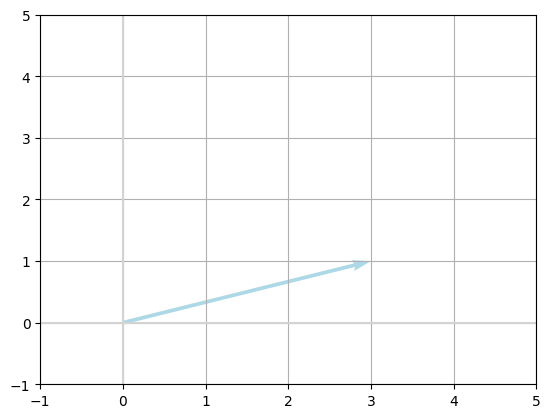

In [5]:
plot_vectors([v], ['lightblue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

In [6]:
# Try with identity matrix
I = np.array([[1,0],[0,1]])
# Apply the identiy matrix I to the vector v (not changed at all)
Iv = np.dot(I,v)
print(Iv)
print(v == Iv)

[3 1]
[ True  True]


(-1.0, 5.0)

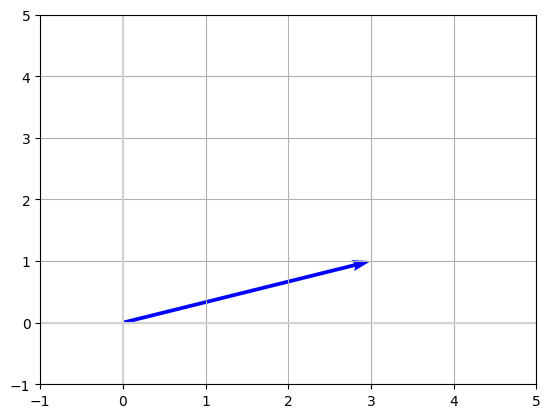

In [7]:
plot_vectors([Iv],'blue')
plt.xlim(-1,5)
plt.ylim(-1,5)

In [8]:
# This matrix (E) flips vector over the axis x
E = np.array([[1,0],[0,-1]])
Ev = np.dot(E,v)
Ev

array([ 3, -1])

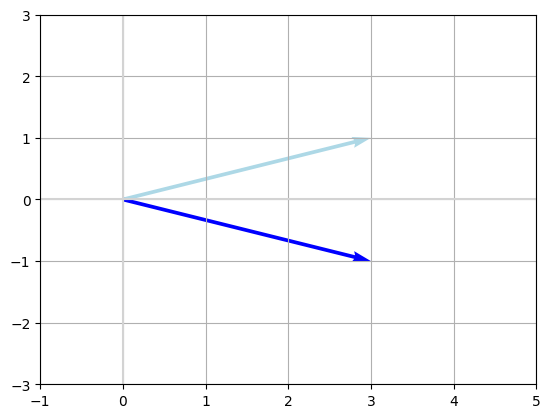

In [9]:
plot_vectors([v,Ev],['lightblue','blue'])
plt.xlim(-1,5)
_ = plt.ylim(-3,3)

In [10]:
# This matrix (F) flips vector over the axis y
F = np.array([[-1,0],[0,1]])
Fv = np.dot(F,v)
Fv

array([-3,  1])

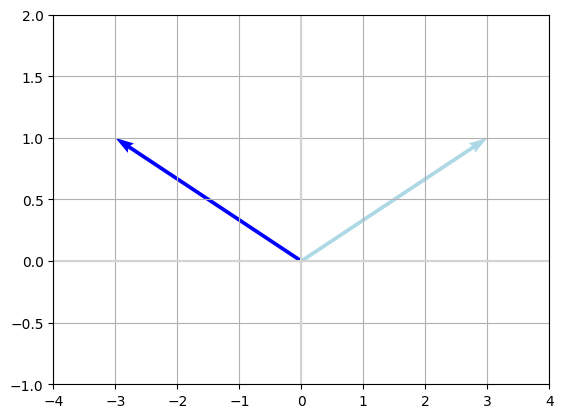

In [11]:
plot_vectors([v,Fv],['lightblue','blue'])
plt.xlim(-4,4)
_ = plt.ylim(-1,2)

### Multiple affine transformation
A single matrix can apply multiple affine transforms simultaneously (e.g., flip over an axis and rotate 45 degrees)

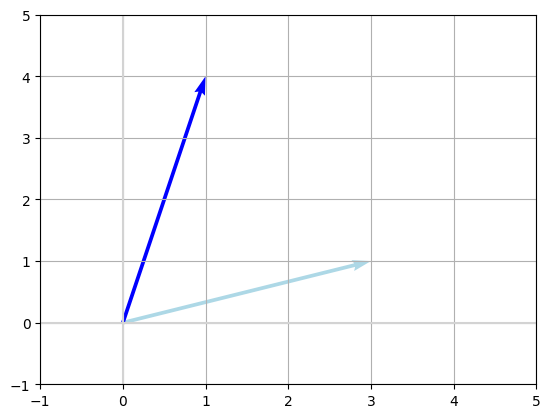

In [12]:
A = np.array([[-1, 4], [2, -2]])
Av = np.dot(A,v)
plot_vectors([v, Av], ['lightblue', 'blue'])
plt.xlim(-1, 5)
_ = plt.ylim(-1, 5)

Concatenate several vectors together into a matrix, where each column is a vector

In [13]:
v3 = np.array([-3, -1])
v4 = np.array([-1, 1])
V = np.concatenate((np.matrix(v).T, np.matrix(v3).T,np.matrix(v4).T), axis=1)
V

matrix([[ 3, -3, -1],
        [ 1, -1,  1]])

In [14]:
# Function to convert column of matrix to 1D vector
def vectorfy(matrx, col):
    return np.array(matrx[:,col]).reshape(-1)
vectorfy(V,1)

array([-3, -1])

### Mathisfun

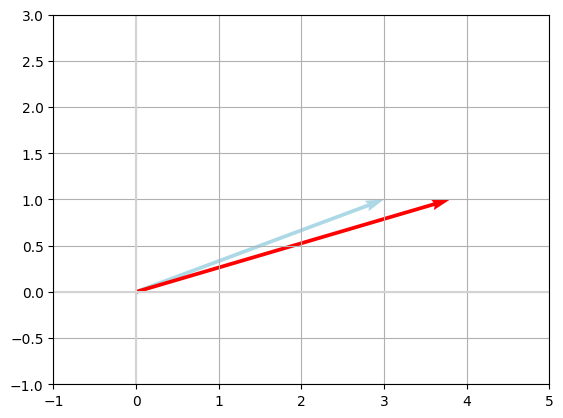

In [15]:
# Shear tranformation
shear_A = np.array([[1, 0.8], [0,1]])
Av = np.dot(shear_A,v)
plot_vectors([v,Av],['lightblue','red'])
plt.xlim(-1,5)
_ = plt.ylim(-1,3)

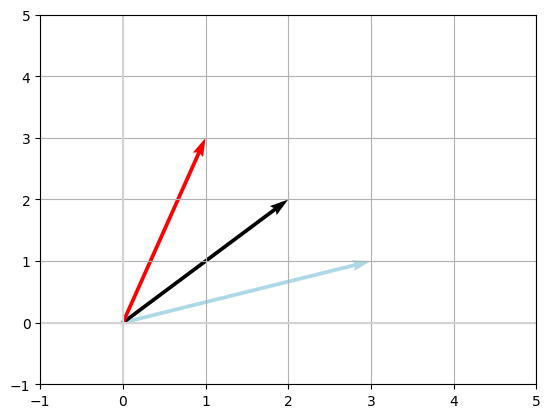

In [16]:
# Diagonal flip
I_inv = np.array([[0,1],[1,0]])
I_inv_v = np.dot(I_inv,v)
diagonal = np.array([2,2])
plot_vectors([v, diagonal, I_inv_v],['lightblue','black','red'])
plt.xlim(-1,5)
_ = plt.ylim(-1,5)

### Quick drawing vectors

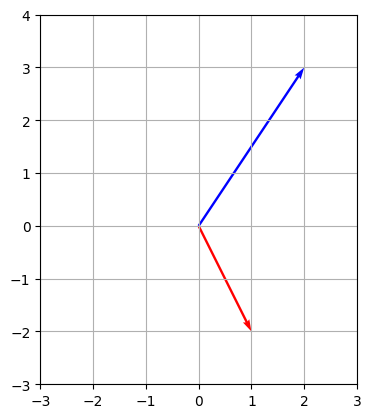

In [17]:
v1 = np.array([2,3])
v2 = np.array([1,-2])

# Create a figure
fig, ax = plt.subplots()
ax.set_xlim(-3,3)
ax.set_ylim(-3,4)

ax.set_aspect('equal')
ax.grid()

ax.quiver(0,0,v1[0],v1[1], angles='xy', scale_units='xy', scale=1, color='blue',label='v1')
ax.quiver(0,0,v2[0],v2[1], angles='xy', scale_units='xy', scale=1, color='red',label='v2')

plt.xlabel 

plt.show()


## 35. Eigenvectors and Eigenvalues
Eigenvector ~ "characteristic vector"
An eigenvector is transformed by a matrix A (Av). Av has the same direction of v, $\lambda$ is the scale of the transformation

In [18]:
A = np.array([[-1,4],[2,-2]])
A

array([[-1,  4],
       [ 2, -2]])

In [19]:
# lambas: a vector of eigenvalues, 
# V: a matrix of eigenvectors (each column is seperate eigenvector v)
lambdas, V = np.linalg.eig(A)
print(lambdas)
print(V)

[ 1.37228132 -4.37228132]
[[ 0.86011126 -0.76454754]
 [ 0.51010647  0.64456735]]


In [20]:
# Check if Av = lambda.v
v1 = V[:,0]
lambda1 = lambdas[0]
print("Eigvenvector 1: ", v1)
print("Lambda 1: ", lambda1)
Av1 = A @ v1
lambda_v1 = lambda1 * v1 # Scale, so just multiply normally
print("Av = ", Av1)
print("Lamda.v =", lambda_v1) 
print(Av1 == lambda_v1) 

Eigvenvector 1:  [0.86011126 0.51010647]
Lambda 1:  1.3722813232690143
Av =  [1.18031462 0.70000958]
Lamda.v = [1.18031462 0.70000958]
[ True  True]


(-1.0, 2.0)

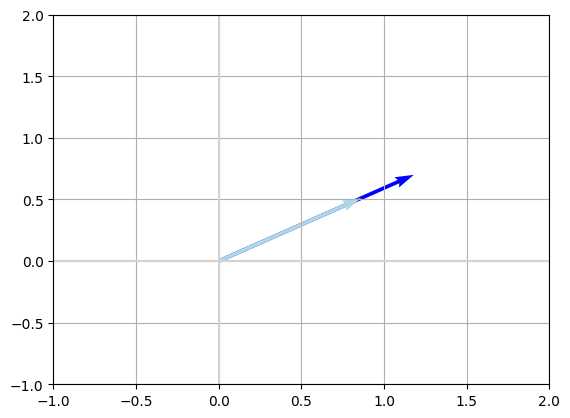

In [21]:
plot_vectors([Av1, v1], ['blue', 'lightblue'])
plt.xlim(-1,2)
plt.ylim(-1,2)

In [22]:
# Check if Av = lambda.v
v2 = V[:,1]
lambda2 = lambdas[1]
print("Eigvenvector 2: ", v2)
print("Lambda 2: ", lambda2)
Av2 = A @ v2
lambda_v2 = lambda2 * v2 # Scale, so just multiply normally
print("Av = ", Av2)
print("Lamda.v =", lambda_v2) 
print(Av2 == lambda_v2) 

Eigvenvector 2:  [-0.76454754  0.64456735]
Lambda 2:  -4.372281323269014
Av =  [ 3.34281692 -2.81822977]
Lamda.v = [ 3.34281692 -2.81822977]
[ True  True]


(-3.0, 2.0)

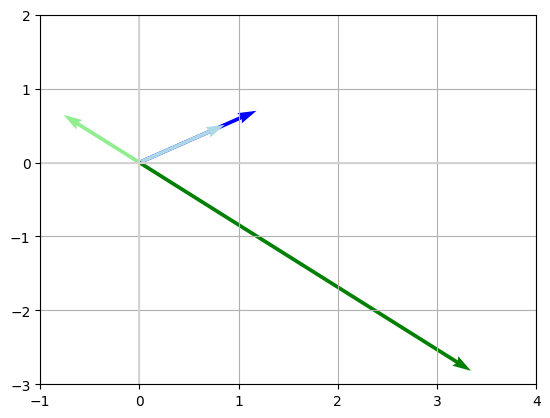

In [23]:
plot_vectors([Av1, v1, Av2, v2], ['blue', 'lightblue', 'green', 'lightgreen'])
plt.xlim(-1,4)
plt.ylim(-3,2) 

### Excercises
1. Use PyTorch to confirm $Xv = \lambda v$ for the first eigenvector of $X$.
2. Confirm $Xv = \lambda v$ for the remaining eigenvectors of $X$ (you can use NumPy or PyTorch, whichever you prefer).

In [24]:
X = np.array([[25, 2, 9], [5, 26, -5], [3, 7, -1]])
X_p = torch.from_numpy(X).float()
X_p 

tensor([[25.,  2.,  9.],
        [ 5., 26., -5.],
        [ 3.,  7., -1.]])

In [25]:
# Return complex values
lambdas_cplx, V_cplx = torch.linalg.eig(X_p)
print(lambdas_cplx)
print(V_cplx)

tensor([29.6762+0.j, 20.6212+0.j, -0.2974+0.j])
tensor([[ 0.7118+0.j,  0.6502+0.j, -0.3422+0.j],
        [ 0.6665+0.j, -0.7446+0.j,  0.2379+0.j],
        [ 0.2217+0.j, -0.1509+0.j,  0.9090+0.j]])


In [26]:
lambdas_p = lambdas_cplx.float()
V_p = V_cplx.float()

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_3348\3312500980.py:1: UserWarning: Casting complex values to real discards the imaginary part (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\aten\src\ATen\native\Copy.cpp:308.)
  lambdas_p = lambdas_cplx.float()


In [27]:
print(torch.matmul(X_p, V_p[:,0]))
print(lambdas_p[0] * V_p[:,0])

tensor([21.1223, 19.7798,  6.5792])
tensor([21.1223, 19.7798,  6.5792])


## 36. Matrix determinants
- Volumne scaling: How much a matrix streches/shrinks space
- Invertibitily: If det(A) = 0, the matrix A is singular (no inverse)
- Orientation: negative => flip

In [28]:
N = np.array([[-4,1],[-8,2]])
N

array([[-4,  1],
       [-8,  2]])

In [29]:
det_N = np.linalg.det(N)
det_N

0.0

In [30]:
# Check det properties
inv_N = np.linalg.inv(N) # Error
inv_N

LinAlgError: Singular matrix

In [ ]:
N2 = np.array([[-3,2],[-8,2]])
det_N2 = np.linalg.det(N2)
inv_N2 = np.linalg.inv(N2) # Error
print(det_N2, inv_N2)

9.999999999999998 [[ 0.2 -0.2]
 [ 0.8 -0.3]]


## 37. Determinants of Larger matrices
(tip: remove row and col ...)

In [ ]:
X = np.array([[1,2,4],[2,-1,3],[0,5,1]])
print(np.linalg.det(X))

19.999999999999996


## 38. Determinants Excercises
My results:
- 1. 94 => invertible
- 2. 4 => invertible
- 3. -26 => invertible

In [ ]:
X_1 = np.array([[25,2],[3,4]])
X_2 = np.array([[-2,0],[0,-2]])
X_3 = np.array([[2,1,-3],[4,-5,2],[0,-1,3]])
print(np.linalg.det(X_1))
print(np.linalg.det(X_2))
print(np.linalg.det(X_3))
print("Inverts")
print(np.linalg.inv(X_1))
print(np.linalg.inv(X_2))
print(np.linalg.inv(X_3))

94.0
4.0
-26.000000000000014
Inverts
[[ 0.04255319 -0.0212766 ]
 [-0.03191489  0.26595745]]
[[-0.5 -0. ]
 [-0.  -0.5]]
[[ 0.5         0.          0.5       ]
 [ 0.46153846 -0.23076923  0.61538462]
 [ 0.15384615 -0.07692308  0.53846154]]


## 39. Determinants and Eigenvalues
- det(X): product of all eigenvalues of X

In [ ]:
# From matrix X above
lambdas, V = np.linalg.eig(X)
print(lambdas,V)

[-3.25599251 -1.13863631  5.39462882] [[-0.38021672  0.80395279  0.7014215 ]
 [-0.59949826  0.23387109  0.47053617]
 [ 0.704299   -0.5467762   0.53535371]]


In [ ]:
# Multiply lambdas together
np.product(lambdas)

19.99999999999999

In [ ]:
N = np.array([[-4,1],[-8,2]])
B = np.array([[1,0],[0,1]])

In [ ]:
print(np.linalg.det(N))
  = np.dot(N,B)
NB

0.0


array([[-4,  1],
       [-8,  2]])

In [ ]:
lambdas, V = np.linalg.eig(N)
lambdas

array([-2.,  0.])

In [ ]:
# Apply Identidy matrix
print(np.linalg.det(I))
print(np.dot(I,B)) # Nothing happen
lambdas, V = np.linalg.eig(I)
lambdas

1.0
[[1 0]
 [0 1]]


array([1., 1.])

In [ ]:
# Apply matrix J
J = np.array([[-0.5, 0],[0,2]])
J

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

In [ ]:
JB = np.dot(J,B)
JB

array([[-0.5,  0. ],
       [ 0. ,  2. ]])

(-1.0, 3.0)

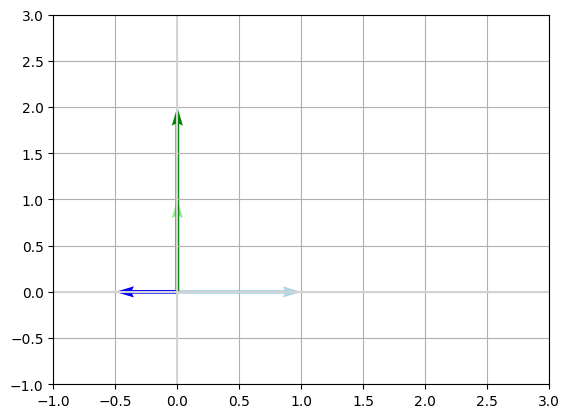

In [ ]:
# Apply matrix J to transform to scale the vector of matrix B
plot_vectors([vectorfy(B,0), vectorfy(B,1), vectorfy(JB,0), vectorfy(JB,1)],
             ['lightblue','lightgreen', 'blue', 'green'])
plt.xlim(-1,3)
plt.ylim(-1,3)

In [ ]:
# So the eigenvalues 
lambdas, V = np.linalg.eig(J)
lambdas

array([-0.5,  2. ])

## 40. Eigendecomposition
- The decomposition of a matrix into eigenvectors and eigenvalues reveals characteristics of the matrix
- $A = V \Lambda V^{-1}$

In [ ]:
# Verify the formula above
A = np.array([[4,2],[-5,-3]])
lambdas, V = np.linalg.eig(A)
print(lambdas)
V*lambdas@np.linalg.inv(V)

[ 2. -1.]


array([[ 4.,  2.],
       [-5., -3.]])

In [ ]:
Lambdas = np.diag(lambdas)
Lambdas

array([[ 2.,  0.],
       [ 0., -1.]])

In [ ]:
V@Lambdas@np.linalg.inv(V)

array([[ 4.,  2.],
       [-5., -3.]])

If A is a symmetric matrix, then:
- $A = Q \Lambda Q^{T}$
- It is cheaper to compute tranpose than inverse, so it's more convenient

In [39]:
# Orthogonal matrix
A = np.array([[1,2,4],[2,5,6],[4,6,8]])
A

array([[1, 2, 4],
       [2, 5, 6],
       [4, 6, 8]])

In [47]:
lambdas, Q = np.linalg.eig(A)
print(lambdas)
print("Matrix Q: \n", Q)

[14.15206735 -1.          0.84793265]
Matrix Q: 
 [[-0.31736789 -0.80178373  0.50637978]
 [-0.56745913 -0.26726124 -0.77882063]
 [-0.75978139  0.53452248  0.37015936]]


In [57]:
# Check if Q is an orthogonal matrix 
print("Length of a vector in orthogonal matrix (orthonormal vector): ",np.linalg.norm(Q[0]))
# QTQ = I
np.dot(Q, np.transpose(Q))

Length of a vector in orthogonal matrix (orthonormal vector):  1.0000000000000004


array([[ 1.00000000e+00, -2.28655066e-16,  2.32239007e-16],
       [-2.28655066e-16,  1.00000000e+00,  9.81412506e-17],
       [ 2.32239007e-16,  9.81412506e-17,  1.00000000e+00]])

In [55]:
np.linalg.norm(Q[0])

1.0000000000000004

In [43]:
Lambdas = np.diag(lambdas)
Lambdas

array([[14.15206735,  0.        ,  0.        ],
       [ 0.        , -1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.84793265]])

In [44]:
Q @ Lambdas @ np.transpose(Q)

array([[1., 2., 4.],
       [2., 5., 6.],
       [4., 6., 8.]])

**Exercises**:

1. Use PyTorch to decompose the matrix $P$ (below) into its components $V$, $\Lambda$, and $V^{-1}$. Confirm that $P = V \Lambda V^{-1}$.
2. Use PyTorch to decompose the symmetric matrix $S$ (below) into its components $Q$, $\Lambda$, and $Q^T$. Confirm that $S = Q \Lambda Q^T$.

In [59]:
P = torch.tensor([[25, 2, -5], [3, -2, 1], [5, 7, 4.]])
P

tensor([[25.,  2., -5.],
        [ 3., -2.,  1.],
        [ 5.,  7.,  4.]])

In [65]:
lambdas, V = torch.linalg.eig(P)
Lambdas = torch.diag(lambdas)
Lambdas

tensor([[23.7644+0.j,  0.0000+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  6.6684+0.j,  0.0000+0.j],
        [ 0.0000+0.j,  0.0000+0.j, -3.4328+0.j]])

In [67]:
result = V @ Lambdas @ torch.linalg.inv(V)
result.float()

tensor([[25.0000,  2.0000, -5.0000],
        [ 3.0000, -2.0000,  1.0000],
        [ 5.0000,  7.0000,  4.0000]])

In [69]:
result = V.float() @ Lambdas.float() @ torch.linalg.inv(V).float()
result

tensor([[25.0000,  2.0000, -5.0000],
        [ 3.0000, -2.0000,  1.0000],
        [ 5.0000,  7.0000,  4.0000]])

In [60]:
# Excercise 2
S = torch.tensor([[25, 2, -5], [2, -2, 1], [-5, 1, 4.]])
S

tensor([[25.,  2., -5.],
        [ 2., -2.,  1.],
        [-5.,  1.,  4.]])

In [88]:
lambdas, Q = torch.linalg.eig(S)
Lambdas = torch.diag(lambdas)
result = Q @ Lambdas @ Q.T
result

tensor([[25.0000+0.j,  2.0000+0.j, -5.0000+0.j],
        [ 2.0000+0.j, -2.0000+0.j,  1.0000+0.j],
        [-5.0000+0.j,  1.0000+0.j,  4.0000+0.j]])

## 41. Eigenvector and Eigenvalue Applications

(0.0, 5.0)

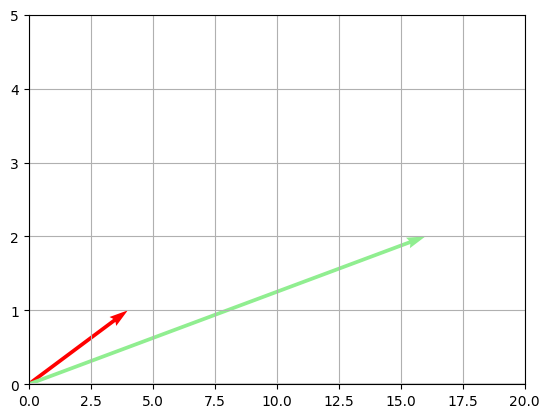

In [107]:
a = np.array([4,1])
A = np.array([[4,0],[0,2]])
a2 = np.dot(a,A)
plot_vectors([a,a2],['red','lightgreen'])
plt.xlim([0,20])
plt.ylim([0,5])

In [108]:
lambdas, Q = np.linalg.eig(A)
lambdas

array([4., 2.])